In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Data
Generate balanced classes of synthetic points in a 2D space.

In [9]:
samples = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0,3],
    cov=[[1,0.5],[0.5,1]],
    size=samples
)
positive_samples = np.random.multivariate_normal(
    mean=[3,0],
    cov=[[1,0.5],[0.5,1]],
    size=samples
)

In [10]:
negative_samples.shape

(1000, 2)

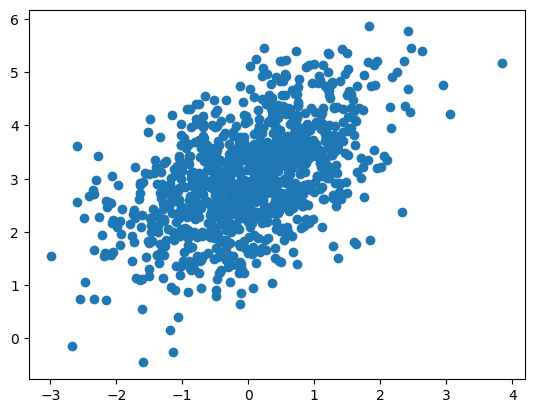

In [22]:
plt.scatter(negative_samples[:,0], negative_samples[:,1]);

In [11]:
positive_samples.shape

(1000, 2)

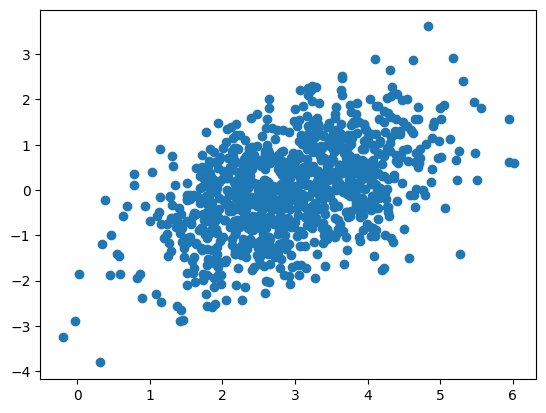

In [23]:
plt.scatter(positive_samples[:,0], positive_samples[:,1]);

Stack the samples into a single rank 2 tensor

In [13]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [14]:
inputs.shape

(2000, 2)

In [16]:
targets = np.vstack((np.zeros((samples,1), dtype="float32"),
                    np.ones((samples,1), dtype="float32")))

In [17]:
targets.shape

(2000, 1)

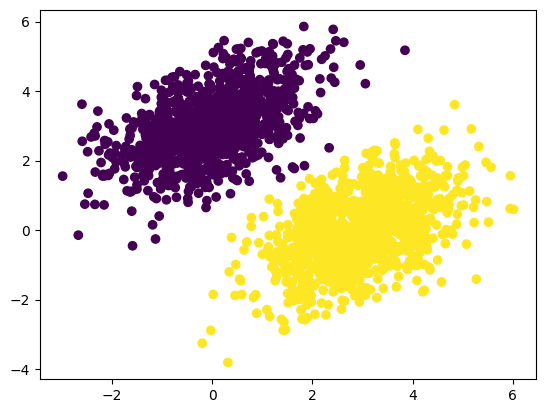

In [24]:
plt.scatter(inputs[:,0], inputs[:,1],c=targets[:,0]);

## Set up
Set up the linear classifier variables

In [26]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [27]:
W

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.9012878],
       [0.6026008]], dtype=float32)>

In [28]:
b

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>

## Forward Pass
Make the forward pass function (effectively a layer)

In [29]:
def model(inputs):
  return tf.matmul(inputs, W) + b

Since this is a 2D classifier, the above is essentially just [[w1, w2]] dot [x,y] + b or

w1 * x + w2 \* y + b

## Loss function

Define a loss function (RMSE in this case)

In [30]:
def square_loss(targets,predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses) #takes an average of this loss and returns a scalar value to represent our loss


## Training Step

Define a training step function that will use the forward pass and loss to adjust weights (using gradient tape)

In [31]:
learning_rate = 0.1

def training_step(inputs,targets):
  with tf.GradientTape() as tape: #open gradient tape as a scope and do a forward pass
    predictions = model(inputs)
    loss = square_loss(predictions, targets)
  # below: backpropagation
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W,b]) # retreive the gradient of the loss with regard to weights
  # update the weights
  W.assign_sub(grad_loss_wrt_W * learning_rate) #subtract gradient loss from the W variable, recall that you must operate on a TF variable, not on the tensor directly
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

## Batch training loop

Not to be confused with mini-batch (as in mini-batch stochastic gradient descent) - we're doing the whole thing for simplicity

In [32]:
for step in range(40): #effectively epochs
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 4.7052
Loss at step 1: 0.6945
Loss at step 2: 0.2159
Loss at step 3: 0.1500
Loss at step 4: 0.1335
Loss at step 5: 0.1234
Loss at step 6: 0.1149
Loss at step 7: 0.1071
Loss at step 8: 0.1000
Loss at step 9: 0.0935
Loss at step 10: 0.0876
Loss at step 11: 0.0822
Loss at step 12: 0.0773
Loss at step 13: 0.0727
Loss at step 14: 0.0686
Loss at step 15: 0.0648
Loss at step 16: 0.0614
Loss at step 17: 0.0582
Loss at step 18: 0.0553
Loss at step 19: 0.0527
Loss at step 20: 0.0503
Loss at step 21: 0.0481
Loss at step 22: 0.0461
Loss at step 23: 0.0442
Loss at step 24: 0.0425
Loss at step 25: 0.0410
Loss at step 26: 0.0396
Loss at step 27: 0.0383
Loss at step 28: 0.0371
Loss at step 29: 0.0361
Loss at step 30: 0.0351
Loss at step 31: 0.0342
Loss at step 32: 0.0334
Loss at step 33: 0.0326
Loss at step 34: 0.0319
Loss at step 35: 0.0313
Loss at step 36: 0.0307
Loss at step 37: 0.0302
Loss at step 38: 0.0297
Loss at step 39: 0.0293


## Make Predictions

Now that the training loop has updated the weights of W and b, we can use the model function again to make predictions

In [33]:
predictions = model(inputs)

In [35]:
predictions

<tf.Tensor: shape=(2000, 1), dtype=float32, numpy=
array([[ 0.24820769],
       [ 0.28220105],
       [-0.06047708],
       ...,
       [ 1.0291038 ],
       [ 1.1564864 ],
       [ 0.79875433]], dtype=float32)>

## Visualize

Since this is 2D, we can visualize the line separating classes (in higher dimensions, the hyperplane).

To do this we can use trusty y = mx+b and remember that because we are prediction 0 or 1, anything predicted lower than 0.5 is closer to 0 and therefore 0; greater than 0.5 is therefore 1.

Equation of the line in a 2D plane is w1 \* x + w2 * y + b = 0.5

or re-arranged:

y = -w1 / w2 \* x + (0.5 - b) / w2

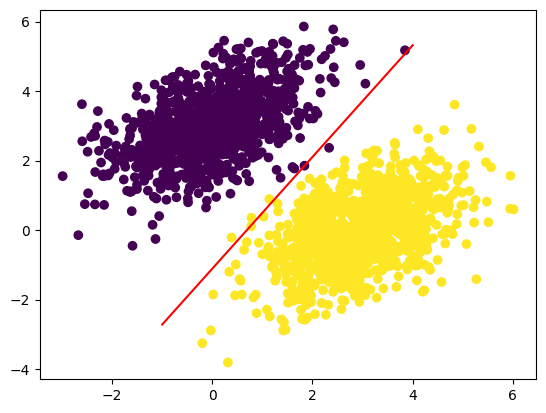

In [38]:
x = np.linspace(-1,4,100) # 100 equally spaced points between -1 and 4 (in our 2D space)
y = -W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x,y, "-r") # just make a line, -r is red
plt.scatter(inputs[:,0], inputs[:,1], c=targets[:,0]);